<a href="https://colab.research.google.com/github/joyce410star/silva--pure-website/blob/main/%E3%80%8CCODE%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#Ë≥áÊñôËß£Â£ìÁ∏Æ
import zipfile

with zipfile.ZipFile("dataset-resized.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

In [24]:
#ËÆÄÂèñÂúñÁâá + Ë™øÊï¥Â§ßÂ∞è + Ê≠£Ë¶èÂåñ + Âª∫Á´ãÊ®ôÁ±§
import os
from PIL import Image
import numpy as np

# ‚úÖ Ê†πÊìö‰Ω†ÁöÑË≥áÊñôÂ§æÂêçÁ®±Ë®≠ÂÆöÊ≠£Á¢∫Ë∑ØÂæë
data_dir = "data/dataset-resized"
categories = [c for c in os.listdir(data_dir) if not c.startswith('.')]
image_size = (128, 128)

X = []
y = []

for idx, category in enumerate(categories):
    folder = os.path.join(data_dir, category)
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)

        # ‚úÖ ÈÅøÂÖçËÆÄÂÖ•ÈùûÂúñÁâáÊ™îÊ°à
        if not (file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg")):
            continue

        try:
            img = Image.open(img_path).convert("RGB")
            img = img.resize(image_size)
            img_array = np.array(img) / 255.0

            if img_array.shape == (128, 128, 3):
                X.append(img_array)
                y.append(idx)
            else:
                print(f"‚ö†Ô∏è Áï•ÈÅéÈùû RGB ÂúñÁâáÔºö{img_path}")

        except Exception as e:
            print(f"‚ùå ÈåØË™§ÂúñÁâáÔºö{img_path}ÔºåÈåØË™§Ôºö{e}")
            continue

X = np.array(X)
y = np.array(y)

print("‚úÖ ÂúñÁâáËÆÄÂèñÂÆåÊàêÔºÅ")
print("ÂúñÁâáË≥áÊñôÁ∂≠Â∫¶Ôºö", X.shape)
print("Ê®ôÁ±§Ë≥áÊñôÁ∂≠Â∫¶Ôºö", y.shape)
print("È°ûÂà•Â∞çÊáâÔºö", dict(enumerate(categories)))


‚úÖ ÂúñÁâáËÆÄÂèñÂÆåÊàêÔºÅ
ÂúñÁâáË≥áÊñôÁ∂≠Â∫¶Ôºö (2527, 128, 128, 3)
Ê®ôÁ±§Ë≥áÊñôÁ∂≠Â∫¶Ôºö (2527,)
È°ûÂà•Â∞çÊáâÔºö {0: 'plastic', 1: 'glass', 2: 'trash', 3: 'paper', 4: 'cardboard', 5: 'metal'}


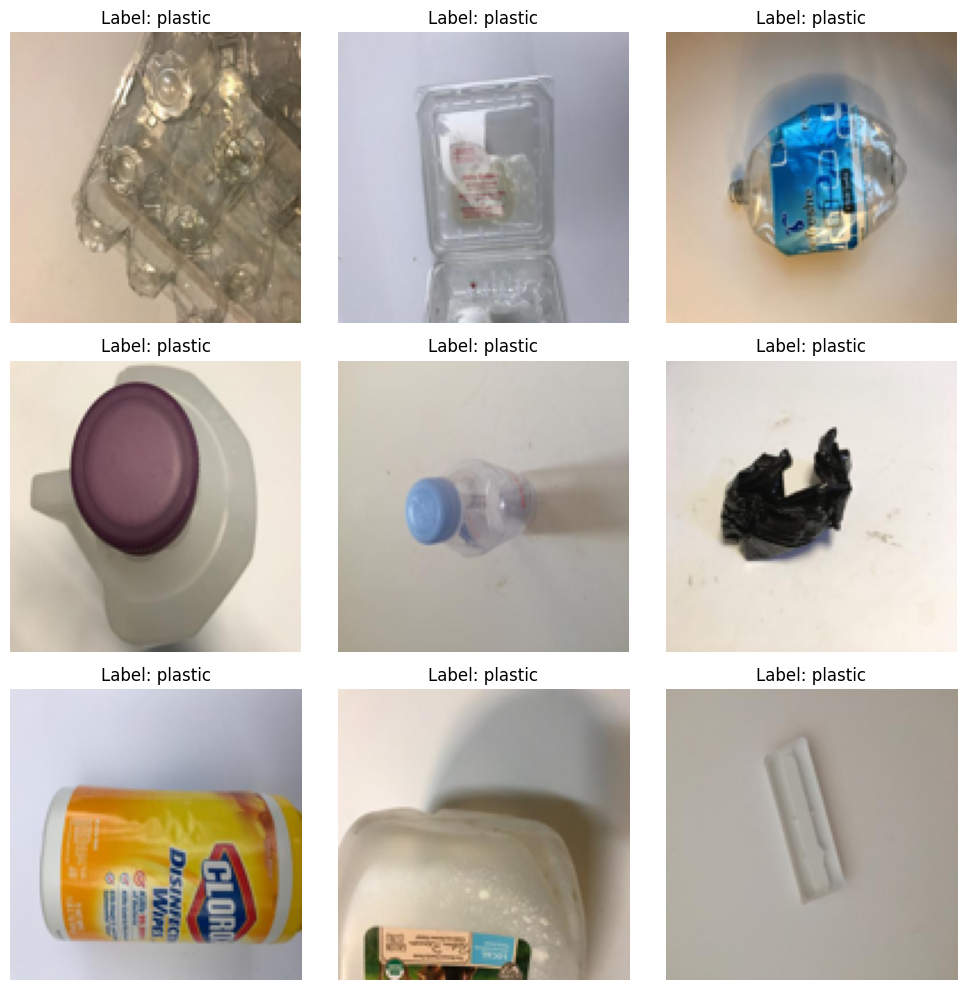

In [25]:
#È°ØÁ§∫Ë≥áÊñôÂÖßÂâç9ÂºµÂúñÁâá
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X[i])
    plt.title(f"Label: {categories[y[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  fig.canvas

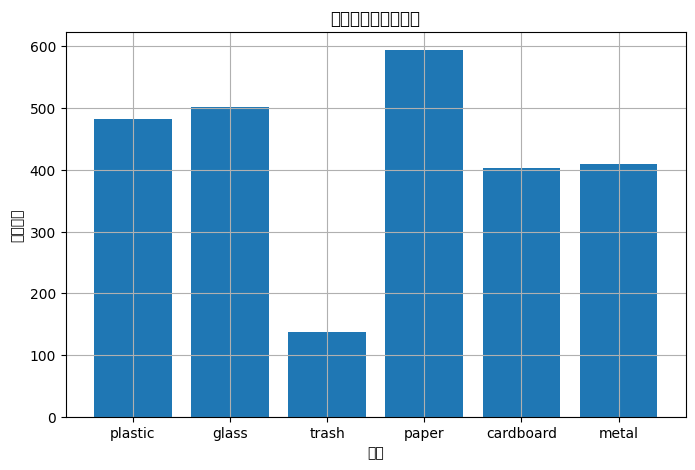

In [26]:
#È°ûÂà•Êï∏ÈáèÁµ±Ë®àÂúñ
import matplotlib.pyplot as plt
import collections

# Ë®àÁÆóÊØèÂÄãÈ°ûÂà•ÁöÑÂúñÁâáÊï∏Èáè
counter = collections.Counter(y)
category_names = [categories[i] for i in range(len(categories))]

plt.figure(figsize=(8, 5))
plt.bar(category_names, [counter[i] for i in range(len(categories))])
plt.title("ÂêÑÈ°ûÂà•ÂúñÁâáÊï∏ÈáèÂàÜÂ∏É")
plt.ylabel("ÂúñÁâáÊï∏Èáè")
plt.xlabel("È°ûÂà•")
plt.grid(True)
plt.show()


In [27]:
#Ë≥áÊñôÂàáÂàÜËàáÈ°ûÂà•Á∑®Á¢ºÔºàË®ìÁ∑¥ÈõÜ/Ê∏¨Ë©¶ÈõÜÔºâ
#ÊääË≥áÊñôÂàáÊàê Ë®ìÁ∑¥ÈõÜ Âíå Ê∏¨Ë©¶ÈõÜÔºà80%/20% ÊØî‰æãÔºâ„ÄÇ
#Êää y ËΩâÊàê one-hot Á∑®Á¢ºÔºàÂõ†ÁÇ∫ CNN Ëº∏Âá∫ÊòØ softmaxÔºâ„ÄÇ

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# ÂàáÂàÜË®ìÁ∑¥ÈõÜËàáÊ∏¨Ë©¶ÈõÜ
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# One-hot Á∑®Á¢ºÊ®ôÁ±§
num_classes = len(categories)
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print("‚úÖ Ë®ìÁ∑¥ÈõÜÂúñÁâáÁ∂≠Â∫¶Ôºö", X_train.shape)
print("‚úÖ Ê∏¨Ë©¶ÈõÜÂúñÁâáÁ∂≠Â∫¶Ôºö", X_test.shape)
print("‚úÖ One-hot Ê®ôÁ±§Á∂≠Â∫¶Ôºö", y_train_cat.shape)


‚úÖ Ë®ìÁ∑¥ÈõÜÂúñÁâáÁ∂≠Â∫¶Ôºö (2021, 128, 128, 3)
‚úÖ Ê∏¨Ë©¶ÈõÜÂúñÁâáÁ∂≠Â∫¶Ôºö (506, 128, 128, 3)
‚úÖ One-hot Ê®ôÁ±§Á∂≠Â∫¶Ôºö (2021, 6)


In [43]:
# 1. ËºâÂÖ•ÂøÖË¶ÅÊ®°ÁµÑ
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # üëà Dropout Âä†ÈÄ≤‰æÜÔºÅ

# 2. ÂÆöÁæ©È°ûÂà•Êï∏ÔºàÊ†πÊìö‰Ω†Ë≥áÊñôÂ§æÔºâ
num_classes = 6

# 3. Âª∫Á´ã CNN Ê®°Âûã
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),  # Êñ∞Â¢ûÁ¨¨‰∏âÂ±§
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),  # ÂÖ®ÈÄ£Êé•Â±§‰πüÂä†Â§ß‰∏ÄÈªû
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])



In [44]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Â∞çÊáâ one-hot
    metrics=['accuracy']
)


In [45]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,          # Ëã•3Ê¨°Ê≤íÈÄ≤Ê≠•Â∞±ÂÅú
    restore_best_weights=True
)


In [46]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/10
64/64 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 48s 723ms/step - accuracy: 0.2576 - loss: 1.7373 - val_accuracy: 0.4249 - val_loss: 1.3886
Epoch 2/10
64/64 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81s 712ms/step - accuracy: 0.4256 - loss: 1.3856 - val_accuracy: 0.4802 - val_loss: 1.2946
Epoch 3/10
64/64 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 46s 722ms/step - accuracy: 0.5015 - loss: 1.2613 - val_accuracy: 0.5791 - val_loss: 1.1469
Epoch 4/10
64/64 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43s 668ms/step - accuracy: 0.5648 - loss: 1.1205 - val_accuracy: 0.5988 - val_loss: 1.0668
Epoch 5/10
64/64 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 80s 640ms/step - accuracy: 0.6295 - loss: 1.0057 - val_accuracy: 0.5692 - val_loss: 1.1461
Epoch 6/10
64/64 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85s 685ms/step - accuracy: 0.6369 - loss: 0.9909 - val_accuracy: 0.5652 - val

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

# Êõø‰ª£ model.fit() ‰ΩøÁî® fit_generator
history = model.fit(
    datagen.flow(X_train, y_train_cat, batch_size=32),
    validation_data=(X_test, y_test_cat),
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
64/64 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 48s 747ms/step - accuracy: 0.5632 - loss: 1.1843 - val_accuracy: 0.6364 - val_loss: 0.9889
Epoch 2/20
64/64 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 48s 742ms/step - accuracy: 0.5814 - loss: 1.0912 - val_accuracy: 0.6601 - val_loss: 0.9536
Epoch 3/20
64/64 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50s 779ms/step - accuracy: 0.6597 - loss: 0.9788 - val_accuracy: 0.5830 - val_loss: 1.0487
Epoch 4/20
64/64 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 48s 746ms/step - accuracy: 0.6412 - loss: 1.0016 - val_accuracy: 0.6759 - val_loss: 0.8916
Epoch 5/20
64/64 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47s 740ms/step - accuracy: 0.6528 - loss: 0.9480 - val_accuracy: 0.7075 - val_loss: 0.8319
Epoch 6/20
64/64 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 48s 751ms/step - accuracy: 0.6805 - loss: 0.8925 - val_accuracy: 0.6640 - val

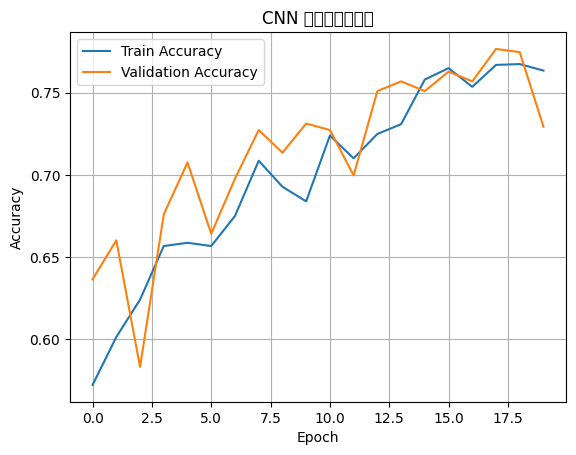

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Ê®°ÂûãÊ∫ñÁ¢∫ÁéáËÆäÂåñ')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
from google.colab import files
uploaded = files.upload()


Saving CC.2.jpg to CC.2 (1).jpg


In [50]:
from PIL import Image
import numpy as np

def predict_image(image_path, model, categories):
    # ËÆÄÂÖ•ÂúñÁâá
    img = Image.open(image_path).convert("RGB")
    img = img.resize((128, 128))  # Â∞çÊáâ‰Ω†Ê®°ÂûãÁöÑËº∏ÂÖ•Â§ßÂ∞è

    # Ê≠£Ë¶èÂåñ
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape((1, 128, 128, 3))  # Â¢ûÂä† batch Á∂≠Â∫¶

    # È†êÊ∏¨
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    predicted_label = categories[predicted_class]

    # È°ØÁ§∫ÁµêÊûú
    print(f"‚úÖ È†êÊ∏¨ÁµêÊûúÔºö{predicted_label}Ôºà‰ø°ÂøÉÂÄºÔºö{predictions[0][predicted_class]:.2f}Ôºâ")

    # È°ØÁ§∫ÂúñÁâá
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 136ms/step
‚úÖ È†êÊ∏¨ÁµêÊûúÔºöcardboardÔºà‰ø°ÂøÉÂÄºÔºö0.50Ôºâ


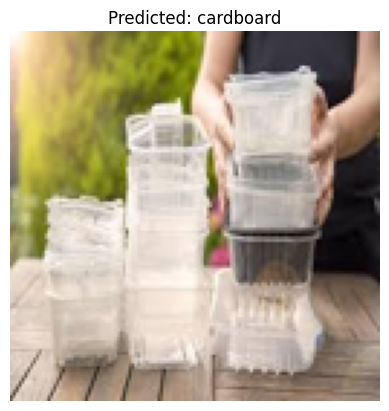

In [51]:
predict_image("CC.2.jpg", model, categories)
